## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df.query('converted == 1').user_id.count()/len(df) 

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.query('group == "control" & landing_page != "old_page"').user_id.count()

1928

In [7]:
df.query('group == "treatment" & landing_page != "new_page"').user_id.count()

1965

f. Do any of the rows have missing values?

In [8]:
df.isnull().any(axis = 1).sum()

#There is no missing value

0

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df.copy()

In [10]:
df2.drop(df.loc[(df['group']=='treatment') & (df['landing_page'] != 'new_page')].index, inplace=True)

In [11]:
df2.drop(df.loc[(df['group']=='control') & (df['landing_page'] != 'old_page')].index, inplace=True)

In [12]:
df2.shape[0]

290585

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2[df2.duplicated(subset='user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

Repeat user_id is index 2893 with user_id 773192

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.drop([2893], inplace=True)

In [17]:
df2[df2.duplicated(subset='user_id')]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [19]:
convert = df2.shape[0]
pro1 = df2.query('converted == 1').user_id.count()/convert
print(f"The probability for converting regarless page is {pro1:2%}")

The probability for converting regarless page is 11.959709%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
con_convert = len(df2.query('group == "control"').user_id)
pro2 = df2.query('converted == 1 and group == "control"').user_id.count()/con_convert
print(f"The probability control converted is {pro2:2%}")


The probability control converted is 12.038630%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
treat_convert = (df2.query('group == "treatment"').shape[0])
pro3 = df2.query('converted == 1 and group == "treatment"').user_id.count()/treat_convert
print(f"The probability for treatment converted is {pro3:2%}")

The probability for treatment converted is 11.880807%


d. What is the probability that an individual received the new page?

In [22]:
new_convert = int(df2.query('landing_page == "new_page"').user_id.nunique())
pro4 = new_convert/ len(df2)
print(f"The probability for receiving new_page is {pro4:2%}")

The probability for receiving new_page is 50.006194%


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**

#The probability for converting regarless page is 11.959709%.

#The probability control converted is 12.038630%.

#The probability for treatment converted is 11.880807%.

#The probability for receiving new_page is 50.006194%.

#There is not enough evidence to show that the new treatment pages leads to more conversion because there is not significant change between treatment and control group.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**


NULL HYPOTHESIS (H0): p_new <= p_old  
ALTERNATIVE HYPOTHESIS = p_new > p_old 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [23]:
#p_new is new page 
df2.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [24]:
con_rate = len(df2["converted"])
p_new = df2.query('converted == 1').user_id.count()/con_rate
print(f"Converstion rate for p_new is {p_new}")

Converstion rate for p_new is 0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [25]:
con_rate = len(df2["converted"])
p_old = df2.query('converted == 1').user_id.count()/con_rate
print(f"Converstion rate for p_old is {p_old}")

Converstion rate for p_old is 0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [26]:
n_new = df2.query('group == "treatment" & landing_page == "new_page"').user_id.count()
print(f" the number of individuals in the treatment group n_new is {n_new}")

 the number of individuals in the treatment group n_new is 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = df2.query('group == "control" & landing_page == "old_page"').user_id.count()
print(f" the number of individuals in the treatment group n_old is {n_old}")

 the number of individuals in the treatment group n_old is 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [28]:
new_page_converted=np.random.choice([0,1],size=n_new, p=[1-p_new,p_new])
#sources code : https://knowledge.udacity.com/questions/230245

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [29]:
old_page_converted=np.random.choice([0,1],size=n_new, p=[1-p_old,p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [30]:
new_page_ctr = new_page_converted.mean()

In [31]:
old_page_ctr = old_page_converted.mean()

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [32]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    obs_diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(obs_diff)
    
#sources code : https://knowledge.udacity.com/questions/32164

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   36.,   225.,   864.,  1955.,  2806.,  2432.,  1233.,   370.,
           72.,     7.]),
 array([-0.00411114, -0.00323152, -0.0023519 , -0.00147228, -0.00059266,
         0.00028696,  0.00116658,  0.0020462 ,  0.00292582,  0.00380544,
         0.00468506]),
 <a list of 10 Patch objects>)

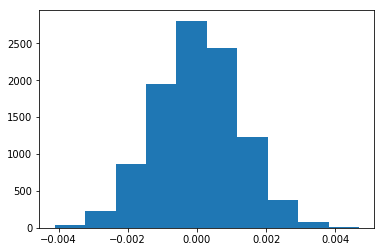

In [33]:
plt.hist(p_diffs)

In [34]:
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

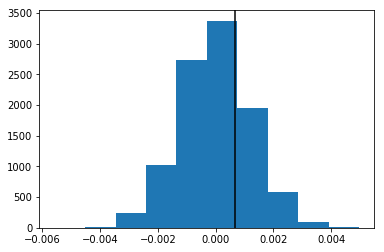

In [35]:
plt.hist(null_vals);
plt.axvline(x=obs_diff,color ='black')


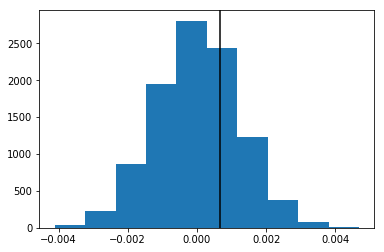

In [36]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff,color ='black')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
(null_vals > obs_diff).mean()

0.28749999999999998

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

It shows the null_values > p value(5%) which means we fail to reject null.
From here we can conclude more people convert to old page rather than new page.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [38]:
import statsmodels.api as sm

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [39]:
convert_old = df2.query('converted == "1" & landing_page == "old_page"').user_id.count()
convert_new = df2.query('converted == "1" & landing_page == "new_page"').user_id.count()
n_old = df2.query('group == "control" & landing_page == "old_page"').user_id.count()
n_new = df2.query('group == "treatment" & landing_page == "new_page"').user_id.count() 

#display the results
print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [40]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value

(1.3109241984234394, 0.18988337448195103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**

z-score functions is to give you an idea of how far from the mean a data point is(convert_rate). But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is. Null Hypothesis(H0) standar deviation is 1.310 which means above the mean. And also the p_value is 0.189 or 0.19 and it doesn't below alpha which is 5% or 0,05.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logical regression because the respose variable is categorical variable. and it doesn't linear regression because there are more 3 variable.

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [41]:
df2['intercept'] = 1
# This will be 0 when treatment and 0 if control
df2['ab_page'] = (df2.group == 'treatment').astype(int)

#sources: https://knowledge.udacity.com/questions/22822
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [42]:
lo = sm.Logit(df2.converted, df2[['intercept','ab_page']])

In [43]:
result_sm = lo.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
result_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-11 04:23 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**
From previous model we have obtained p_value around 0.190 and ab_page shows under alpha(5%) which is 0.0140, which means more likely to converted page

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**
Yes, to add another variable is needing because at this point group treament and control don't show any impact to determine the converter. Hence, it is good idea to add another variable

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
country = pd.read_csv('countries.csv')
country.head()
df2 = df.join(country.set_index('user_id'), on='user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,US


In [46]:
df2['intercept'] = 1
# This will be 0 when treatment and 0 if control
df2['ab_page'] = (df2.group == 'treatment').astype(int)

#sources: https://knowledge.udacity.com/questions/22822

In [47]:
df2[['CA', 'UK', 'US']] = pd.get_dummies(df2['country'])

In [48]:
df2.drop('US',axis='columns', inplace=True)

In [49]:
lo = sm.Logit(df2.converted, df2[['intercept','ab_page', 'UK', 'CA']])

In [50]:
result_sm = lo.fit()

Optimization terminated successfully.
         Current function value: 0.366238
         Iterations 6


In [51]:
result_sm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-11 04:23 AIC:              215706.3094
No. Observations:   294478           BIC:              215748.6812
Df Model:           3                Log-Likelihood:   -1.0785e+05
Df Residuals:       294474           LL-Null:          -1.0785e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9892    0.0088  -225.2463  0.0000  -2.0065  -1.9719
ab_page      -0.0140    0.0114    -1.2335  0.2174  -0.0363   0.0082
UK            0.0093    0.0132     0.7014  0.4830  -0.0166   0.0352
CA           -0.0357    0.0266    -1.3388  0.1806  -0.0879   0.0166
==================================================================

"""

Based on the p-values, it appears that country doesn't significant impact toward this model, where p-value > 0,05.  

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
df2['CA_page'] = df2['CA'] * df2['ab_page']
df2['UK_page'] = df2['UK'] * df2['ab_page']

In [53]:
lo = sm.Logit(df2.converted, df2[['intercept','ab_page', 'CA_page', 'UK_page']])
result_sm = lo.fit()
result_sm.summary2()

Optimization terminated successfully.
         Current function value: 0.366235
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-11 04:23 AIC:              215704.4430
No. Observations:   294478           BIC:              215746.8148
Df Model:           3                Log-Likelihood:   -1.0785e+05
Df Residuals:       294474           LL-Null:          -1.0785e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9887    0.0080  -248.2967  0.0000  -2.0044  -1.9730
ab_page      -0.0166    0.0125    -1.3288  0.1839  -0.0412   0.0079
CA_page      -0.0598    0.0380    -1.5715  0.1161  -0.1343   0.0148
UK_page       0.0221    0.0187     1.1794  0.2382  -0.0146   0.0587
==================================================================

"""

Based on the p-values, it appears statisticially that country doesn't significant impacttoward this model, where UK_page p-value > 0,05.  

In [54]:
np.exp(result_sm.params)

intercept    0.136879
ab_page      0.983503
CA_page      0.941975
UK_page      1.022299
dtype: float64

In [55]:
print(1/1.022299)

0.9781873991855611


<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [56]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0